In [18]:
import pandas as pd
import numpy as np
import datetime

orders = pd.read_csv("/Users/Tony/Desktop/git/mllab/Orders.csv")
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [19]:
list(orders)

['Row.ID',
 'Order.ID',
 'Order.Date',
 'Ship.Date',
 'Ship.Mode',
 'Customer.ID',
 'Customer.Name',
 'Segment',
 'Postal.Code',
 'City',
 'State',
 'Country',
 'Region',
 'Market',
 'Product.ID',
 'Category',
 'Sub.Category',
 'Product.Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping.Cost',
 'Order.Priority']

In [20]:
orders['Profit'] = orders['Profit'].apply(lambda x: x.replace('$', "")).apply(lambda x: x.replace(',', "")).astype('float')
orders['Sales'] = orders['Sales'].apply(lambda x: x.replace('$', "")).apply(lambda x: x.replace(',', "")).astype('float')

In [21]:
orders['Order.Date'] = pd.to_datetime(orders['Order.Date'])
orders['Ship.Date'] = pd.to_datetime(orders['Ship.Date'])

In [22]:
orders['Order.Month'] = orders['Order.Date'].dt.month
orders['Ship.Month'] = orders['Ship.Date'].dt.month

In [23]:
orders.groupby('Order.Month').sum()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Ship.Month
Order.Month,,,,,,,,
1,71468915,21500486.0,676789.30,8872,365.122,73440.45,71225.18900,2971
2,60085551,17761468.0,554650.21,7429,307.574,72932.18,59878.28000,4758
3,79093205,36758872.0,760518.34,10390,432.354,91873.45,76723.92404,9418
4,75926778,34498859.0,695978.86,10466,448.146,73822.57,75072.86600,12485
5,98261611,40926610.0,915493.24,13196,543.822,106970.07,102015.17500,19482
6,131905558,37416928.0,1262081.29,18009,790.932,144604.35,136484.15800,32484
7,83547530,38467854.0,752306.46,11046,480.996,76525.50,83946.55136,22766
8,134609033,40569319.0,1294315.55,17596,669.940,154593.48,136980.73600,41138
9,152061754,74350359.0,1431754.01,20479,817.468,169705.94,149609.70900,54283


In [24]:
category2 = orders.groupby(['Order.Month','Category']).sum()

category2 = category2.reset_index()

(array([    0.,  2000.,  4000.,  6000.,  8000., 10000., 12000., 14000.,
        16000.]), <a list of 9 Text yticklabel objects>)

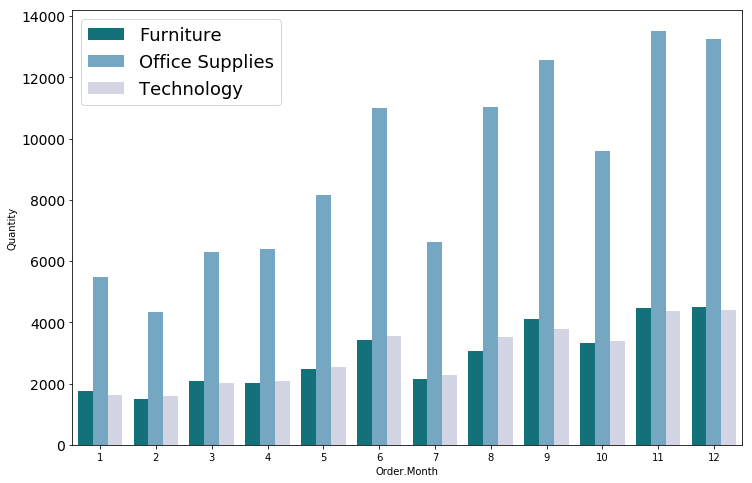

In [26]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.barplot(y="Quantity", x="Order.Month", hue="Category", data= category2, palette='PuBuGn_r')
plt.legend(loc='best', fontsize='18')
plt.yticks(fontsize='14')

In [28]:
returns = pd.read_csv("/Users/Tony/Desktop/git/mllab/Returns.csv")
returns.head()

,Returned,Order ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [29]:
list(returns)

['Returned', 'Order ID', 'Region']

In [31]:
returns.shape

(1079, 3)

In [32]:
orders.shape

(51290, 26)

In [41]:
returns.columns = ['Returned', 'Order.ID', 'Region']

In [42]:
returns.columns

Index(['Returned', 'Order.ID', 'Region'], dtype='object')

In [44]:
returns.head()

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


In [167]:
Orders_Returns = pd.merge(orders, returns, how="left")

In [168]:
Orders_Returns['Returned'] = Orders_Returns['Returned'].fillna(0)
Orders_Returns['Returned'] = Orders_Returns['Returned'].replace("Yes", 1)

In [169]:
Orders_Returns

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Order.Month,Ship.Month,Returned
0,40098,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,Samsung Convoy 3,221.98,2,0.00,62.15,40.770,High,11,11,0
1,26341,IN-2014-JR162107-41675,2014-02-05,2014-02-07,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.10,-288.77,923.630,Critical,2,2,0
2,25330,IN-2014-CR127307-41929,2014-10-17,2014-10-18,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.490,Medium,10,10,0
3,13524,ES-2014-KM1637548-41667,2014-01-28,2014-01-30,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.160,Medium,1,1,0
4,47221,SG-2014-RH9495111-41948,2014-11-05,2014-11-06,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.040,Critical,11,11,0
5,22732,IN-2014-JM156557-41818,2014-06-28,2014-07-01,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,"Samsung Smart Phone, with Caller ID",2862.68,5,0.10,763.28,897.350,Critical,6,7,0
6,30570,IN-2012-TS2134092-41219,2012-11-06,2012-11-08,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,"Novimex Executive Leather Armchair, Adjustable",1822.08,4,0.00,564.84,894.770,Critical,11,11,0
7,31192,IN-2013-MB1808592-41378,2013-04-14,2013-04-18,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,"Chromcraft Conference Table, Fully Assembled",5244.84,6,0.00,996.48,878.380,High,4,4,0
8,40099,CA-2014-AB10015140-41954,2014-11-11,2014-11-13,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,"Sauder Facets Collection Library, Sky Alder Fi...",341.96,2,0.00,54.71,25.270,High,11,11,0
9,36258,CA-2012-AB10015140-40974,2012-03-06,2012-03-07,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,"Global Push Button Manager's Chair, Indigo",48.71,1,0.20,5.48,11.130,High,3,3,0


In [101]:
Orders_Returns.groupby('Returned').sum()

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month
Returned,,,,,,,,,
0,1259615638,525327959.0,1.212001e+07,170681,7005.000,1406687.42,1.297598e+06,368629,366257
1,55742057,26244693.0,5.225009e+05,7631,324.728,60769.25,6.048811e+04,16868,16849


In [149]:
returnedDF = Orders_Returns.groupby(['Customer.Name']).sum().sort_values('Returned', ascending = False)

In [151]:
returnedDF[returnedDF['Returned'] > 1]

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned
Customer.Name,,,,,,,,,,
Patrick O'Brill,2209680,1032035.0,26707.51,370,14.420,3778.37,2994.241,765,774,21
Jeremy Pistek,1804640,1143590.0,18656.57,266,8.462,3170.16,1648.271,639,645,20
Tom Boeckenhauer,2575326,1302970.0,24479.32,283,14.300,4196.36,2288.139,685,694,17
Muhammed Yedwab,2785629,1012978.0,29642.66,351,16.722,2642.64,3056.218,768,760,17
Greg Tran,2389836,1625032.0,35550.97,310,12.306,5214.11,3000.288,647,608,15
Anne McFarland,2076680,665791.0,25522.32,303,7.790,3238.59,3410.441,586,606,15
Juliana Krohn,1925445,618868.0,23134.24,287,13.012,1798.24,2364.487,690,676,14
Ben Ferrer,2170031,1367025.0,23219.77,316,6.642,4135.12,1966.726,638,645,14
Daniel Lacy,1935095,624338.0,12196.70,219,18.572,1108.45,1257.091,495,506,14


In [164]:
returnedDF[returnedDF['Returned'] > 5]

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned
Customer.Name,,,,,,,,,,
Patrick O'Brill,2209680,1032035.0,26707.51,370,14.420,3778.37,2994.241,765,774,21
Jeremy Pistek,1804640,1143590.0,18656.57,266,8.462,3170.16,1648.271,639,645,20
Tom Boeckenhauer,2575326,1302970.0,24479.32,283,14.300,4196.36,2288.139,685,694,17
Muhammed Yedwab,2785629,1012978.0,29642.66,351,16.722,2642.64,3056.218,768,760,17
Greg Tran,2389836,1625032.0,35550.97,310,12.306,5214.11,3000.288,647,608,15
Anne McFarland,2076680,665791.0,25522.32,303,7.790,3238.59,3410.441,586,606,15
Juliana Krohn,1925445,618868.0,23134.24,287,13.012,1798.24,2364.487,690,676,14
Ben Ferrer,2170031,1367025.0,23219.77,316,6.642,4135.12,1966.726,638,645,14
Daniel Lacy,1935095,624338.0,12196.70,219,18.572,1108.45,1257.091,495,506,14


In [157]:
returnedDF2 = Orders_Returns.groupby(['Region']).sum().sort_values('Returned', ascending = False)

In [158]:
returnedDF2

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned
Region,,,,,,,,,,
Central America,28719567,0.0,1223100.79,20882,616.450,158981.81,131820.0740,44089,43958,248
Western Europe,91755103,0.0,1731931.05,22262,531.750,218433.33,185841.1500,43441,42954,233
Western US,116212926,293739752.0,725457.93,12266,350.200,108418.69,77022.2639,25691,25420,177
Oceania,93550762,0.0,1100185.69,12838,534.100,120089.66,120801.5100,25346,25216,154
Southeastern Asia,79270216,0.0,884423.95,11822,851.330,17852.34,93878.8440,23073,22856,140
Eastern US,103204927,50171698.0,678781.36,10618,414.000,91522.80,73257.6200,22361,22313,134
South America,16023569,0.0,617223.64,11345,549.288,28090.48,67470.1650,23164,23066,133
Eastern Asia,60531025,0.0,855059.62,8922,113.900,167101.62,95833.8100,17525,17630,131
Southern Europe,34783392,0.0,608594.14,7871,202.600,70109.35,63286.4700,15544,15567,112


In [159]:
returnedDF3 = Orders_Returns.groupby(['Category']).sum().sort_values('Returned', ascending = False)

In [160]:
returnedDF3

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned
Category,,,,,,,,,,
Office Supplies,815958427,331805633.0,3787495.46,108244,4300.990,518594.84,410302.4550,234421,232981,1334
Technology,258483051,102603754.0,4744558.76,35176,1372.508,663779.21,507196.8794,76305,75851,442
Furniture,240916217,117163265.0,4110453.03,34892,1656.230,285082.62,440586.3690,74771,74274,426


In [162]:
returnedDF4 = Orders_Returns.groupby(['Sub.Category']).sum().sort_values('Returned', ascending = False)

In [163]:
returnedDF4

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned
Sub.Category,,,,,,,,,,
Binders,168430903,83303241.0,461870.09,21403,1101.880,72432.92,49773.1020,46273,45983,263
Art,134022389,42203408.0,371613.70,16215,571.880,57829.90,41889.0820,36122,35946,216
Storage,134895670,45764974.0,1126813.78,16884,699.490,108416.94,120793.8520,37652,37317,208
Paper,95415295,74139501.0,241787.67,12672,384.500,58111.27,26864.0850,26572,26401,150
Chairs,79915221,34936229.0,1501682.16,12336,560.120,140396.24,164253.3520,26027,25922,147
Phones,88973053,47897175.0,1706824.65,11870,489.610,216717.44,184953.4920,25113,25040,145
Accessories,79332919,44468434.0,749237.28,10946,370.480,129626.44,83592.3340,23330,23181,137
Furnishings,83538784,50847669.0,385156.15,11163,475.080,46845.56,40981.6560,23781,23699,135
Labels,62940487,19262366.0,73350.55,9301,313.490,14988.80,8840.7250,19438,19354,135


In [170]:
Orders_Returns['Process.Time'] = Orders_Returns['Ship.Date'] - Orders_Returns['Order.Date']

In [183]:
returnedDF6 = Orders_Returns.groupby(['Process.Time']).agg(sum).sort_values('Returned', ascending = False)

In [186]:
returnedDF6['Returned.Pct'] = returnedDF6['Returned'] / returnedDF6['Quantity']
returnedDF6 # Process time has little affect on whether product was returned or not.

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned,Returned.Pct
Process.Time,,,,,,,,,,,
4 days,369447491,151232909.0,3592035.75,50474,2069.620,418310.65,325491.6800,108138,107658,616,0.012204
5 days,288156163,120091265.0,2694170.08,38953,1622.210,319991.81,212274.6665,84112,83583,478,0.012271
6 days,160687783,64500058.0,1511282.19,21657,864.458,176082.93,113655.6240,47322,47236,310,0.014314
2 days,179255565,73988869.0,1797886.98,24232,999.554,205307.79,274814.9789,53426,53166,277,0.011431
3 days,131032736,53832269.0,1206713.77,17616,724.516,137028.54,180103.0400,37433,37149,220,0.012489
7 days,74192419,36212988.0,777644.97,10704,440.534,93862.83,65373.2000,23302,22618,125,0.011678
0 days,68844850,29161672.0,647619.01,8854,375.488,73451.78,112362.2990,19246,19246,115,0.012988
1 days,43740688,22552622.0,415154.50,5822,233.348,43420.34,74010.2150,12518,12450,61,0.010477


In [173]:
returnedDF5 = Orders_Returns.groupby(['Product.ID']).sum().sort_values('Returned', ascending = False)

In [174]:
returnedDF5

,Row.ID,Postal.Code,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Month,Ship.Month,Returned
Product.ID,,,,,,,,,,
OFF-FA-6129,8184599,12123717.0,7008.19,876,21.200,2611.04,799.430,1755,1728,12
OFF-ST-6033,2137435,0.0,25397.16,250,13.060,-237.69,3036.454,568,545,9
OFF-ST-6251,795742,0.0,2358.81,129,4.910,123.60,262.188,285,278,6
OFF-AR-3499,1503120,0.0,6739.87,185,8.840,618.46,573.996,372,364,6
OFF-ST-6031,1204649,0.0,12840.07,137,8.480,-1381.01,1360.228,299,305,6
OFF-AR-3494,1323345,0.0,4836.17,207,6.740,1215.28,571.548,419,410,5
OFF-BI-3723,1150643,0.0,1616.17,143,6.570,141.05,189.440,335,330,5
OFF-AR-3548,1093925,0.0,1618.17,122,4.500,191.61,180.429,339,309,5
OFF-ST-5712,764136,0.0,6253.85,127,4.370,2016.77,658.407,252,257,5


ModuleNotFoundError: No module named 'PlottingFunction'